In [4]:
import sys
assert sys.version_info >= (3, 7)

## Linear Regression Model - 
Linear Regression is finding a straight line that best fits data points to predict a numerical outcome.
### For example, 
Plotting study hours versus exam scores helps predict a score for a student who studied a certain number of hours.
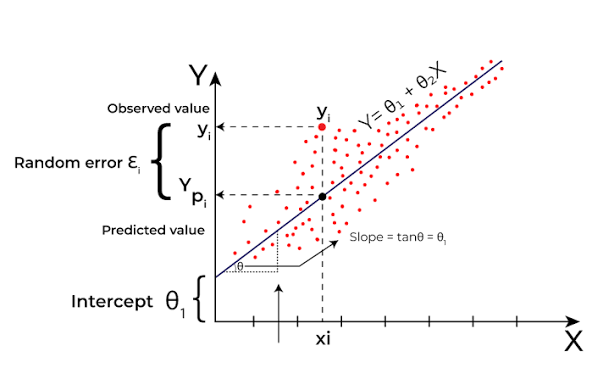

In [5]:
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")
import matplotlib.pyplot as plt
import numpy as np

plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

np.random.seed(42)

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Download and prepare the data
data_root = "https://github.com/shekh-abdullah-ayubi/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")
lifesat

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6
5,Portugal,32181.154537,5.4
6,Poland,32238.157259,6.1
7,Estonia,35638.421351,5.7
8,Spain,36215.447591,6.3
9,Slovenia,36547.738956,5.9


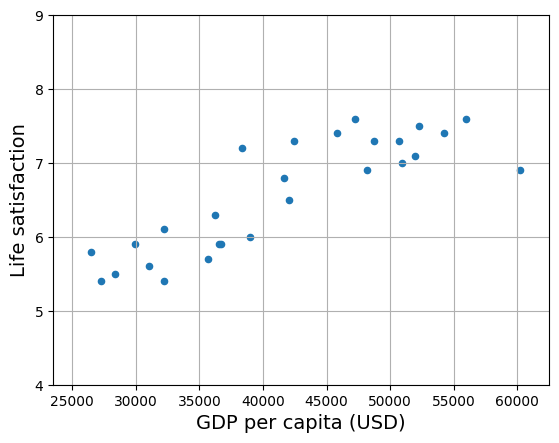

[[6.30165767]]


In [7]:
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

# Visualize the data
lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.show()

# Select a linear model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for some random value
X_new = [[37_655.2]] 
print(model.predict(X_new))

## K-nearest neighbor (KNN) algorithm
The K-nearest neighbor (KNN) algorithm classifies a new data point based on the majority vote of its 'k' closest data points in a training dataset. In simple terms, it assumes that similar things are near each other

In [8]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)

# Train the model
model.fit(X, y)

# Make a prediction for random value
print(model.predict(X_new))

[[6.33333333]]


##### Generic method to save the generated figures 

In [9]:
from pathlib import Path

# Where to save the figures
IMAGES_PATH = Path() / "images" / "fundamentals"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

#### Data Pre-processing
Load and prepare life satisfaction data and its indicators using Better Life Index dataset (i.e. oecd_bli.csv) and GPD per Capita dataset (i.e. gdp_per_capita.csv) based on various Nations for 2019 year

In [10]:
# dataframe creation
oecd_bli = pd.read_csv(data_root +"lifesat/oecd_bli.csv")
gdp_per_capita = pd.read_csv(data_root + "lifesat/gdp_per_capita.csv")

gdp_year = 2019
gdppc_col = "GDP per capita (USD)"
lifesat_col = "Life satisfaction"

gdp_per_capita = gdp_per_capita[gdp_per_capita["Year"] == gdp_year]
gdp_per_capita = gdp_per_capita.drop(["Code", "Year"], axis=1)
gdp_per_capita.columns = ["Country", gdppc_col]
# Marking Country as Index in order to perform join 
gdp_per_capita.set_index("Country", inplace=True)

gdp_per_capita.head()


,GDP per capita (USD)
Country,
Afghanistan,2065.036235
Africa Eastern and Southern,3568.597017
Africa Western and Central,4142.398382
Albania,13671.488422
Algeria,11510.557088


In [11]:
#transfrming Better life index dataset 
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

oecd_bli.head()
# sample check for one record 
# oecd_bli.loc["Australia"]


Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3


Now let's merge the life satisfaction data and the GDP per capita data, keeping only the GDP per capita and Life satisfaction columns:

In [12]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                              left_index=True, right_index=True)
full_country_stats.sort_values(by=gdppc_col, inplace=True)
full_country_stats = full_country_stats[[gdppc_col, lifesat_col]]

full_country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,12481.813507,4.7
Colombia,14585.302491,6.3
Brazil,14763.871697,6.4
Mexico,19701.337670,6.5
Chile,24967.580212,6.5


In [13]:
min_gdp = 23_500
max_gdp = 63_500

country_stats = full_country_stats[(full_country_stats[gdppc_col] >= min_gdp) &
                                   (full_country_stats[gdppc_col] <= max_gdp)]
datapath = Path() / "datasets" / "lifesat"
datapath.mkdir(parents=True, exist_ok=True)
country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
Chile,24967.580212,6.5
Russia,27210.545998,5.8
Turkey,28199.051591,5.5
Greece,29723.221958,5.4
Latvia,30858.750075,5.9


In [14]:
country_stats.to_csv(datapath / "lifesat.csv")
full_country_stats.to_csv(datapath / "lifesat_full.csv")

##### Data visualization of GDP per capita vs Life Satisfaction 

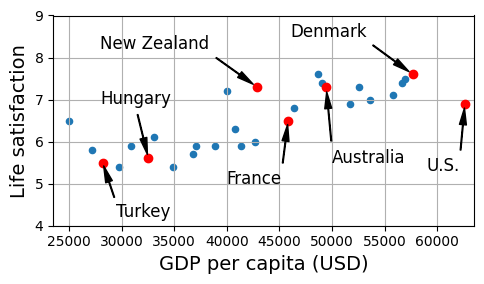

In [15]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

# plt.show()
min_life_sat = 4
max_life_sat = 9

# Annotated text position declaration 
position_text = {
    "Turkey": (29_500, 4.2),
    "Hungary": (28_000, 6.9),
    "France": (40_000, 5),
    "New Zealand": (28_000, 8.2),
    "Australia": (50_000, 5.5),
    "United States": (59_000, 5.3),
    "Denmark": (46_000, 8.5)
}

for country, pos_text in position_text.items():
    pos_data_x = country_stats[gdppc_col].loc[country]
    pos_data_y = country_stats[lifesat_col].loc[country]
    country = "U.S." if country == "United States" else country
    # print(pos_data_x,pos_data_y)
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

save_fig('Money_happiness_scatterplot')
plt.show()


In [16]:
highlighted_countries = country_stats.loc[list(position_text.keys())]
highlighted_countries[[gdppc_col, lifesat_col]].sort_values(by=gdppc_col)

,GDP per capita (USD),Life satisfaction
Country,,
Turkey,28199.051591,5.5
Hungary,32553.523700,5.6
New Zealand,42877.942911,7.3
France,45834.166912,6.5
Australia,49455.538508,7.3
Denmark,57678.098893,7.6
United States,62630.873277,6.9


New Y Ranging from 4.2 to 4.2


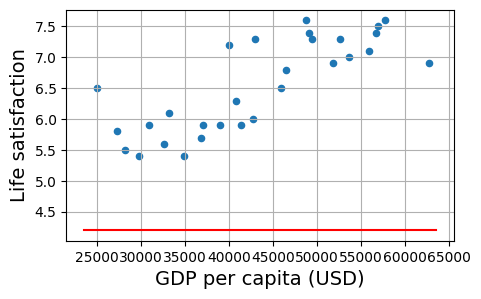

In [34]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)

w1, w2 = 4.2, 0
print(f'New Y Ranging from {(w1 + w2 * 1e-5 * X)[0]} to {(w1 + w2 * 1e-5 * X)[-1]}')
plt.plot(X, w1 + w2 * 1e-5 * X, "r")


#### Various LaTeX command that renders the Greek letter :-
In Matplotlib, various LaTeX commands are used to produce mathematical expressions. For a subscript, use `x_0`, which results in the symbol $x_0$. For a superscript, `y^2` is used, which renders as $y^2$. Greek letters like $\alpha$, $\beta$, and $\theta$ are displayed with the commands `\alpha`, `\beta`, and `\theta`. To show a fraction, use `\frac{numerator}{denominator}` which renders as $\frac{numerator}{denominator}$. The command for a square root is `\sqrt{x}`, which displays as $\sqrt{x}$. The infinity symbol $\infty$ is produced with `\infty`. To show a sum, use `\sum_{i=0}^{n}` for the result $\sum_{i=0}^{n}$. Operators like `\times` (multiplication) and `\pm` (plus/minus) produce $\times$ and $\pm$. Finally, for special fonts like calligraphic or bold, use commands such as `\mathcal{A}` (for $\mathcal{A}$) and `\mathbf{x}` (for $\mathbf{x}$).


New Y green line Ranging 7.885 to 4.284999999999999
New Y blue line Ranging 4.88 to 8.08


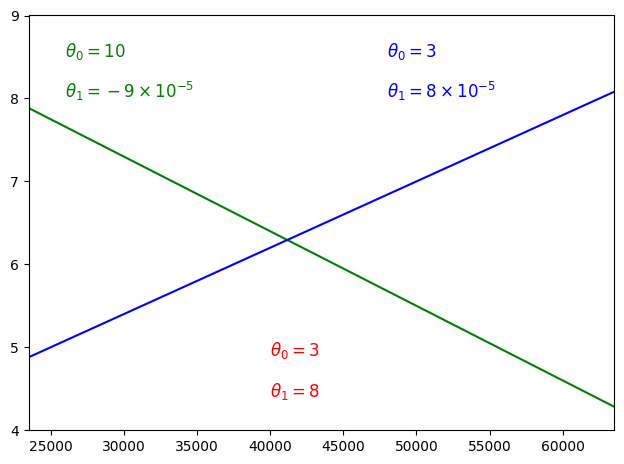

In [36]:
plt.text(40_000, 4.9, fr"$\theta_0 = {w1}$", color="r")
plt.text(40_000, 4.4, fr"$\theta_1 = {w2}$", color="r")

w1, w2 = 10, -9
print(f'New Y green line Ranging {(w1 + w2 * 1e-5 * X)[0]} to {(w1 + w2 * 1e-5 * X)[-1]}')
plt.plot(X, w1 + w2 * 1e-5 * X, "g")

plt.text(26_000, 8.5, fr"$\theta_0 = {w1}$", color="g")
plt.text(26_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="g")

w1, w2 = 3, 8
print(f'New Y blue line Ranging {(w1 + w2 * 1e-5 * X)[0]} to {(w1 + w2 * 1e-5 * X)[-1]}')
plt.plot(X, w1 + w2 * 1e-5 * X, "b")
plt.text(48_000, 8.5, fr"$\theta_0 = {w1}$", color="b")
plt.text(48_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

save_fig('tweaking_model_params_plot')
plt.show()

In [52]:
from sklearn import linear_model

X_sample = country_stats[[gdppc_col]].values
y_sample = country_stats[[lifesat_col]].values

lin1 = linear_model.LinearRegression()
lin1.fit(X_sample, y_sample)
lin1.coef_[0]


array([5.65163319e-05])

##### List of attributes for a trained LinearRegression model:

intercept_: 
A NumPy array or float that holds the independent term in the linear model, also known as the y-intercept.
For a simple linear regression with one feature, this will be a single value, typically extracted with lin_reg.intercept_[0] or simply lin_reg.intercept_.

coef_: 
An attribute that holds the coefficient(s) of the model. For a simple linear regression, this is an array containing the single coefficient (slope).

.ravel(): 
This method flattens the array into a 1D array. While not strictly necessary for a single-feature model, it's good practice for consistency, especially when dealing with multiple features.

Hence, 

##### Analogy to y=mx+c 

m: The value of lin1.coef_.ravel()[0].

c: The value of lin1.intercept_[0].

y: The predicted value.

x: The independent variable from your dataset

In [62]:
t0, t1 = lin1.intercept_[0], lin1.coef_.ravel()[0]
print(f"theta0={t0:.2f}, theta1={t1:.2e}")   

theta0=4.11, theta1=5.65e-05


Analyzing the dataset over scatter plot

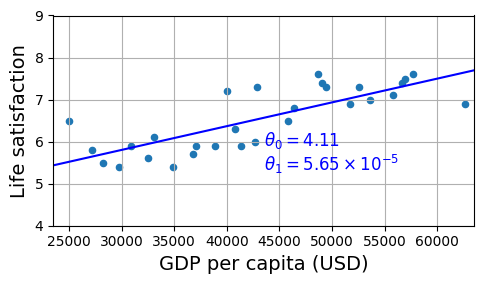

In [53]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t0 + t1 * X, "b")

plt.text(max_gdp - 20_000, min_life_sat + 1.9,
         fr"$\theta_0 = {t0:.2f}$", color="b")
plt.text(max_gdp - 20_000, min_life_sat + 1.3,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])
save_fig('best_fit_model_plot')
plt.show()

In [60]:
turkey_gdp_per_capita = gdp_per_capita[gdppc_col].loc["Turkey"]
turkey_predicted_life_satisfaction = lin1.predict([[turkey_gdp_per_capita]])[0,0]
turkey_gdp_per_capita,turkey_predicted_life_satisfaction

(np.float64(28199.0515906708), np.float64(5.70091701276353))

New Y Blue line ranging from 5.435343853465976 to 7.695997129329614 


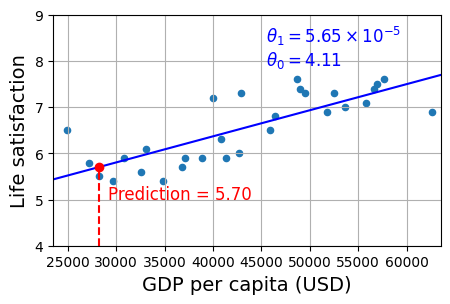

In [61]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)
print(f'New Y Blue line ranging from {(t0 + t1 * X)[0]} to {(t0 + t1 * X)[-1]} ')
plt.plot(X, t0 + t1 * X, "b")

plt.text(min_gdp + 22_000, max_life_sat - 1.1,
         fr"$\theta_0 = {t0:.2f}$", color="b")
plt.text(min_gdp + 22_000, max_life_sat - 0.6,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

plt.plot([turkey_gdp_per_capita, turkey_gdp_per_capita],
         [min_life_sat, turkey_predicted_life_satisfaction], "r--")
plt.text(turkey_gdp_per_capita + 1000, 5.0,
         fr"Prediction = {turkey_predicted_life_satisfaction:.2f}", color="r")
plt.plot(turkey_gdp_per_capita, turkey_predicted_life_satisfaction, "ro")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

plt.show()

In [64]:
missing_data = full_country_stats[(full_country_stats[gdppc_col] < min_gdp) |
                                  (full_country_stats[gdppc_col] > max_gdp)]

missing_data



,GDP per capita (USD),Life satisfaction
Country,,
South Africa,12481.813507,4.7
Colombia,14585.302491,6.3
Brazil,14763.871697,6.4
Mexico,19701.337670,6.5
Norway,64452.812617,7.6
Switzerland,70920.324726,7.5
Ireland,87786.156927,7.0
Luxembourg,113940.237442,6.9


In [65]:
position_text_missing_countries = {
    "South Africa": (20_000, 4.2),
    "Colombia": (6_000, 8.2),
    "Brazil": (18_000, 7.8),
    "Mexico": (24_000, 7.4),
    "Chile": (30_000, 7.0),
    "Norway": (51_000, 6.2),
    "Switzerland": (62_000, 5.7),
    "Ireland": (81_000, 5.2),
    "Luxembourg": (92_000, 4.7),
}